In [3]:
import os
import numpy as np
import pandas as pd
import json
from google.colab import drive
import matplotlib.pyplot as plt
import pickle
import math
import random

In [4]:
drive.mount('/content/drive')
DRIVE_PATH = "/content/drive/MyDrive/REU evolution of scientific fields"

Mounted at /content/drive


In [ ]:
#Create dataframe (uncomment), with papers ordered by (json) index
fields_list = []
for index in range(0,258001,1000):
  with open(os.path.join(DRIVE_PATH, 'fos_results_v2', 'Cog_Sci_Fos_' + str(index) + '.json')) as field_f:
    fields_dict0 = json.load(field_f)
    fields_dict0 = fields_dict0["entities"]
    fields_list.extend(fields_dict0)
fields_df = pd.DataFrame(fields_list)

In [ ]:
#Save dataset with pickle
with open(os.path.join(DRIVE_PATH, 'fields_df.pkl'), 'wb') as file:
    pickle.dump(fields_df, file)

In [5]:
#Load saved dataframe (if the above two code blocks have already been run, 
#comment them out and uncomment this one to save time)
'''
with open(os.path.join(DRIVE_PATH, 'fields_df.pkl'), 'rb') as file:
    fields_df = pickle.load(file)
'''

# **SUMMARY INFO**

# Journals of Publication

In [ ]:
print(sum(~pd.isna(fields_df.J)), 'papers have journal data;', sum(pd.isna(fields_df.J)), 'papers lack journal data')

117223 papers have journal data; 140816 papers lack journal data


In [ ]:
fields_df_with_journals = fields_df[~pd.isna(fields_df.J)]
list_of_journals = fields_df_with_journals["J"].apply(lambda f: f.get("JN")) #Get journal from each entry
journals_freq = list_of_journals.value_counts()
journals_freq[:2990] #Some most common journals and some less common ones

behavioral and brain sciences            2343
cognitive science                        1397
trends in cognitive sciences             1279
journal of symbolic logic                1224
psyccritiques                            1168
                                         ... 
journal of second language writing          6
art journal                                 6
drug and alcohol dependence                 6
journal of tangshan college                 6
computer animation and virtual worlds       6
Name: J, Length: 2990, dtype: int64

Text(0, 0.5, 'Frequency (Number of Journals)')

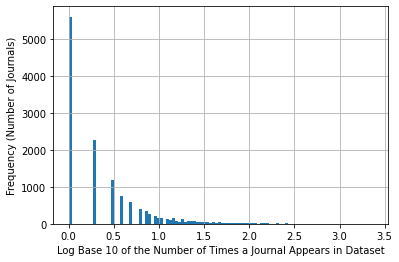

In [ ]:
log_journals_freq = np.log10(journals_freq)
log_journals_freq.hist(bins=100)
plt.xlabel("Log Base 10 of the Number of Times a Journal Appears in Dataset")
plt.ylabel("Frequency (Number of Journals)")

117223 papers have Journal information, 140816 do not. 1397 are in the journal Cognitive Science. But the top journals are only a small fraction of the papers with journals; overwhelmingly most journals are only represented 1, 2, or a handful of times.

# Years of Publication

In [ ]:
sum(pd.isna(fields_df.Y)) #All papers have year metadata

0

Text(0, 0.5, 'Frequency (Number of Papers)')

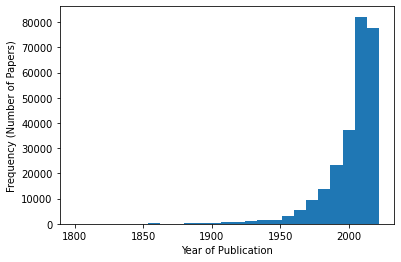

In [ ]:
years_freq = fields_df["Y"].value_counts()
years_freq[:10]
plt.hist(fields_df["Y"], bins=25)
plt.xlabel("Year of Publication")
plt.ylabel("Frequency (Number of Papers)")

Text(0, 0.5, 'Frequency (Number of Papers)')

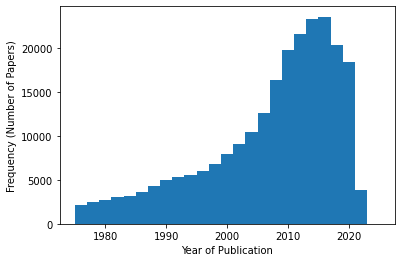

In [ ]:
plt.hist(fields_df["Y"], range=[1975, 2025], bins=25)
plt.xlabel("Year of Publication")
plt.ylabel("Frequency (Number of Papers)")

Papers up to the early 1900s would not be about our current definition of cognitive science.

# Authors

In [ ]:
sum(pd.isna(fields_df.AA)) #All papers have author metadata

0

In [ ]:
list_of_authors = []
list_of_authors_IDs = []
for aa in fields_df.AA:
  for a in aa:
    list_of_authors.append(a.get("AuN"))

In [ ]:
authors_freq = pd.DataFrame(list_of_authors).value_counts()
authors_freq[:10]

robert j sternberg    172
karl j friston        150
nick chater           137
michael a arbib       128
andy clark            126
liane gabora          114
william bechtel       113
peter hagoort         110
alonzo church         109
shaun gallagher       106
dtype: int64

# Fields Tags

In [ ]:
sum(pd.isna(fields_df.F)) #All papers have field metadata

0

In [ ]:
list_of_fields = []
list_of_field_IDs = []
for f in fields_df.F:
  for field in f:
    list_of_fields.append(field.get("FN"))
    list_of_field_IDs.append(field.get("FId"))
len(list_of_fields) == len(list_of_field_IDs) #All fields have an ID

True

In [ ]:
fields_freq = pd.DataFrame(list_of_fields).value_counts()
fields_freq[:10]

cognitive science          258039
psychology                 140177
computer science            53129
cognition                   35544
artificial intelligence     17660
cognitive psychology        16447
sociology                   13313
epistemology                13237
perception                  11853
philosophy                  11758
dtype: int64

All papers are tagged with cognitive science, as they should be. The tags are generated by Microsoft; we could use this to identify relationships.

# References

In [ ]:
print(sum(~pd.isna(fields_df.RId)), 'papers have reference data;', sum(pd.isna(fields_df.RId)), 'papers lack reference data')

97015 papers have reference data; 161024 papers lack reference data


In [ ]:
fields_df_with_refs = fields_df[~pd.isna(fields_df.RId)]
num_refs = fields_df_with_refs["RId"].apply(lambda f: len(f))
num_refs_freq = num_refs.value_counts()
num_refs_freq[:10]

1     5515
2     3439
3     3123
4     2970
5     2887
6     2646
7     2507
8     2437
10    2339
9     2306
Name: RId, dtype: int64

Text(0, 0.5, 'Frequency (# of Papers)')

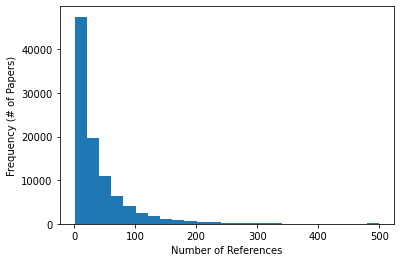

In [ ]:
plt.hist(num_refs, bins=25)
plt.xlabel("Number of References")
plt.ylabel("Frequency (# of Papers)")

Text(0, 0.5, 'Frequency (# of Papers)')

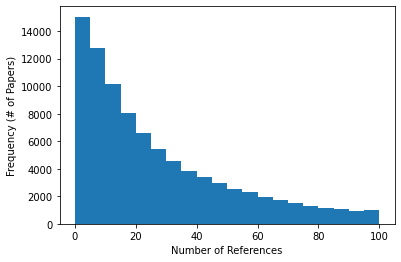

In [ ]:
plt.hist(num_refs, range=[0, 100], bins=20)
plt.xlabel("Number of References")
plt.ylabel("Frequency (# of Papers)")

In [ ]:
num_refs.describe()

count    97015.000000
mean        38.916281
std         52.411064
min          1.000000
25%          8.000000
50%         21.000000
75%         49.000000
max        500.000000
Name: RId, dtype: float64

Many papers only cite one or a few other papers. Possibly it is an author's previous paper, or a commentary on another paper. Or perhaps they actually do cite more papers, but those papers do not have an ID in the database, so they are not included in the referenced paper IDs field.

Although not important for our analysis, another consideration is whether there a way to differentiate papers with zero references from those missing reference data.

Of note is that 500 appears to be a hard cap on the number of references. 500 could be a citation count limit by the Microsoft Academic.

# Abstracts

In [ ]:
print(sum(~pd.isna(fields_df.IA)), 'papers have abtracts;', sum(pd.isna(fields_df.IA)), 'papers lack abtract data')

106943 papers have abtracts; 151096 papers lack abtract data


In [6]:
fields_df_with_abstract = fields_df[~pd.isna(fields_df.IA)]
abstracts = []
for ia in fields_df_with_abstract.IA:
  temp = [""]*ia['IndexLength']
  for word, idxs in ia['InvertedIndex'].items():
    for idx in idxs:
      temp[idx] = word
  abstracts.append(" ".join(temp))

## Word Count

In [9]:
num_words = fields_df_with_abstract["IA"].apply(lambda f: f.get('IndexLength'))
num_words_freq = num_words.value_counts()
num_words_freq[:15] #Frequency of number of words in abstract

150    878
29     858
30     848
151    818
28     785
31     758
32     728
149    722
27     705
148    675
99     660
152    654
147    646
120    637
146    635
Name: IA, dtype: int64

Text(0, 0.5, 'Frequency (# of Papers)')

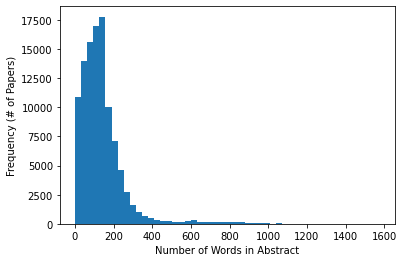

In [ ]:
plt.hist(num_words, bins=50)
plt.xlabel("Number of Words in Abstract")
plt.ylabel("Frequency (# of Papers)")

Text(0, 0.5, 'Frequency (# of Papers)')

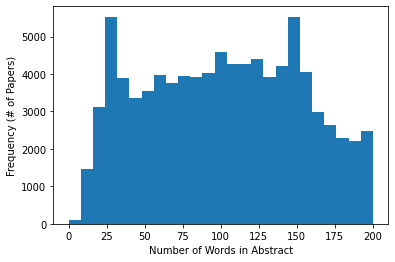

In [ ]:
plt.hist(num_words, range=[0, 200], bins=25)
plt.xlabel("Number of Words in Abstract")
plt.ylabel("Frequency (# of Papers)")

In [ ]:
num_words.describe()

count    106943.000000
mean        141.323443
std         126.013806
min           1.000000
25%          67.000000
50%         119.000000
75%         172.000000
max        1575.000000
Name: IA, dtype: float64

Some journals may have an 150 word limit (or a character limit corresponding to about 150 words), which would explain the spike around 150.

Meanwhile, some abstracts may be previews so they seem to cut off at around 30 words (or some number of characters corresponding to about 30 words). This could be a limitation of Microsoft Academic failing to obtain the full abstract text. These partial abstracts could be potentially be meaningful to train on, but may also be flawed due to their sharp cutoff.

Some extremely long or short abstracts may not actually be abstracts.

## Character Count

In [ ]:
num_chars = [len(a) for a in abstracts]
num_chars_freq = pd.DataFrame(num_chars).value_counts()
num_chars_freq[:15] #Frequency of number of characters in abstract

200     3429
1023    1947
201      493
100      197
300      193
98       176
298      125
97       124
299      112
95       111
294      109
94       109
96       108
500      103
783      102
dtype: int64

Text(0, 0.5, 'Frequency (# of Papers)')

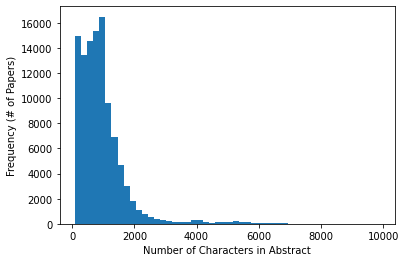

In [ ]:
plt.hist(num_chars, bins=50)
plt.xlabel("Number of Characters in Abstract")
plt.ylabel("Frequency (# of Papers)")

Text(0, 0.5, 'Frequency (# of Papers)')

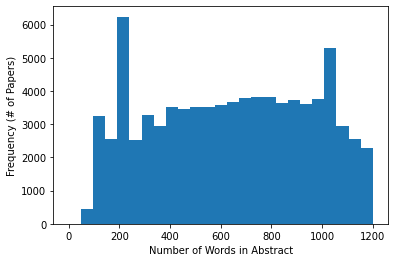

In [ ]:
plt.hist(num_chars, range=[0, 1200], bins=25)
plt.xlabel("Number of Words in Abstract")
plt.ylabel("Frequency (# of Papers)")

In [ ]:
pd.DataFrame(num_chars).describe()

,0
count,106943.000000
mean,958.437785
std,845.140090
min,91.000000
25%,459.000000
50%,810.000000
75%,1168.000000
max,9872.000000


Examining the number of characters largely mirrors the number of words, unsurprisingly.

The abstracts with about 150 words seem to correspond to about 1023 characters, which seems quite arbitrary.

Meanwhile, the abstracts with around 30 words seem to correspond to around 200 characters, which seems to be a plausible preview cutoff.

## Text

In [ ]:
#'Abstracts' with 15 words are overwhelmingly not abstracts; 
#they are titles, subtitles, and other text
temp = [abstracts[i] for i, num in enumerate(num_words) if num == 15]
random.seed(64) #For consistency when running cells
randIndex = random.sample(range(len(temp)), k=50)
[temp[i] for i in randIndex]

['Unfolding the Dynamics of Emotions in Strategizing : How Emotions Drive or Counteract Change Activities',
 'I give a brief overview of the major contentions and methodologies of my book, Self-Expression.',
 'Abstracts for the 5th World Congress of NeuroRehabilitation, 24 - 27 September 2008, Brasilia, Brazil',
 'Subguide of the Psychology guide, presenting resources in applied and engineering psychology including human factors.',
 'This paper explores the cognitive content, and the cognitive benefits, of the state of wonder.',
 "This guide was created to support Professor Norman's Psychology 1 course and library orientation session",
 'Abstract H. Julia Hannay (Editor) Oxford University Press, ISBN 019 503585 2. 604 pp. £55.00',
 'This article presents a review of the book "Reasoning, Learning and Action," by Chris Argyris.',
 "In this research investigation, the author has detailed about 'The Uncertainity Of The Conscious Mind'.",
 'Resources for T1 - Human Gross and Developmental A

In [ ]:
#'Abstracts' with 20 words are generally not abstracts
temp = [abstracts[i] for i, num in enumerate(num_words) if num == 20]
random.seed(64)
randIndex = random.sample(range(len(temp)), k=50)
[temp[i] for i in randIndex]

['In this article, maternal symbolism of the mountain conceiving individuation was examined in the context of analytical psychology. Three significant...',
 'Fil: Sigman, Mariano. Cognitive Neuroimaging Research Unit of l’Institut National de la Sante et de la recherche Medicale, Orsay, France',
 'The article concentrates on cognitive and pragmatic factors underlying discourse. Discourse is viewed as a unity of cognition and communication.',
 'Keywords: Philosophie ; Epistemologie et histoire des sciences ; Section PH Reference EPFL-STUDENT-164076 Record created on 2011-03-06, modified on 2017-05-12',
 'Messy play can be good for so many things.One being that it can be great for improving children′s language skills.',
 'Mary Mountstephen investigates Pervasive Developmental Delay and suggests how to support children with the disorder, should you recognise the signs.',
 's: This paper probes into the connotation, realistic basis, theory grounds And meaning of integrative teaching in Chi

In [ ]:
#Abstracts with 25 words are partial abstracts sometimes, 
#and extraneous text other times
temp = [abstracts[i] for i, num in enumerate(num_words) if num == 25]
random.seed(64)
randIndex = random.sample(range(len(temp)), k=50)
[temp[i] for i in randIndex]

['David, as always, thanks for your diligent work on this module! \r\n\r\nI love the look of the new changes and the concept of "Jam" as',
 'A model is proposed to explain how emotional and cognitive processes drive epistemic activities within individual scientists. In this account, emotion–cognition interactions produce cyclical phases...',
 'Physician and musician Eckart Altenmuller talks about the goose-bump factor in music, the wonder of neuroplasticity and the potential for sound-assisted therapies. An expert interview',
 'Cells sense chemical gradients, communicate gradient information throughout the cell, and change their shape in response. Statistics, materials science, and more underlie thoseessential biological processes.',
 "Dans le contexte de l'analyse de la neuropsychologie cognitive, l'A. se demande ce que l'engagement philosophique peut reveler de la nature de la philosophie elle-meme",
 'Article accompanying a poster presentation for the 2014 Annual Computational Neuro

In [ ]:
#Abstracts with 30 words are mostly partial abstracts 
temp = [abstracts[i] for i, num in enumerate(num_words) if num == 30]
random.seed(64)
randIndex = random.sample(range(len(temp)), k=50)
[temp[i] for i in randIndex]

['This article aims to study the relationship between today’s canonical and noncanonical authors in the domain of early modern natural philosophy through the lens of social network analysis. By study...',
 'As people become more sensitive to dimensions of products that go beyond traditional aspects of usability, the need to understand emotion and experience and their implications for product design in...',
 'Association and imagination are the two aspects of graph creativity.The replacement principle’s application in graph creativity can produce a deep and new visual image.Logic misplacement imbues graphs with profound meaning.',
 'Once a peripheral concern, human cognition is starting to take center stage in the study of organizational social networks. In recent years, a number of contributions have deepened our understandin...',
 'Karl S. Lashley was a major figure of twentieth-century neuropsychology, whose work on the relation between brain function and behavior, especially learnin

In [11]:
#'Abstracts' with 490-500 words are sometimes (long) abstracts
#but may have extraneous text within, and sometimes are not abstracts at all
temp = [abstracts[I] for I, num in enumerate(num_words) if 490 <= num <= 500]
random.seed(64)
randIndex = random.sample(range(len(temp)), k=50)
[temp[i] for i in randIndex]

['In this dissertation, I study how war memories are translated via digital games, and how they circulate within the realm of digital culture. Rather than considering the game or the mnemonic aspects in isolation, the study of the intersection between war memory and game culture entails an engagement with the messy and intermingled connectedness of the phenomenon as a network. My approach is to follow these translations as they travel – a game is designed, a game is played, a game is recorded, a recorded gameplay is shared, and finally, a game is played. This dissertation consists of four articles, with each its own focus. In article one, I describe how game developers translate cultural memory into morally complex gameplay. In article two, I describe the role of YouTube video producers and their role in circulating war memories. In article three, I describe the Yugoslav War discourses emerging in game publics on YouTube. Lastly, in article four, I describe how post-war Bosnian youth r

In [12]:
#'Abstracts' with 500+ words are sometimes (long) abstracts 
#but may have extraneous text within, and sometimes not abstracts at all
temp = [abstracts[I] for I, num in enumerate(num_words) if num > 500]
random.seed(64)
randIndex = random.sample(range(len(temp)), k=50)
[temp[i] for i in randIndex]

['Machine functionalism, or, the computational theory of mind, states that the inner workings of the brain are akin to the information processing of a computer. There are numerous faults with this view. Not only are computers inaccurate models for brain states, but also consciousness--as understood as generating appropriate (behavior) outputs to corresponding inputs--can’t be generated through mechanical means. In everyday language, the functions of the brain are commonly described using mecanical terminology. For instance a friend might say that “the wheels are turning slowly” in the morning before her first cup of coffee, or after hours of mental labor, she’s starting to “run out of steam.” How we apply mechanical based metaphors to the brain demonstrate how we think about it--as a machine. To be more specific, we tend to think of the brain as type of organic computer. Likewise, one of the most common themes in science fiction is that of the self-aware computer with individual person

We find that almost all 'abstracts' of less than about 25 words are not actually abstracts, but instead other text such as titles and publication information. At around 25 words, we begin to see abstracts that hit a character limit and are cut off, but are otherwise valid and so can still be used. We take the above random samples of 50 abtracts for each of several word lengths and count the number that can be roughly identified as actual abstracts:
*   of 15 words, only 14/50 could be identified as abstracts
*   of 20 words, only 24/50 were identified as abstracts
*   of 25 words, 37/50 were abstracts
*   of 30 words, 43/50 were abstracts

Towards the high end of word counts, some abstracts are just extremely long, but others are made longer by the insertion of extraneous text such as authors, references, and journal information. Some are not (just) abstracts, but rather also contain the entire first page or the full text of the paper; yet others are tables of contents. From the distribution, 500 words seems to be a reasonable cuttoff. We are also motivated by the dirth of abstracts around 500 words and the presense of more abstracts of greater length, suggesting 500 may separate legitimate abstracts from other text (see scatter plot of abstract length vs index in next section). Again, taking random samples of 50 abtracts,
*   of just under 500 words (between 490 and 500), 32/50 were essentially entirely abstracts, though the number would be higher (closer to 35-40) if we include abstracts with a moderate amount of other text/information
*   of more than 500 words, 20/50 were identified as abstracts. There were many more full texts of the first page, suggesting that this may be the reason there appears to be a cluster of abstracts with length around 600-800 words (see later scatter plot).

# Relationships between measures

Text(0, 0.5, 'Length of Abstract (# Words)')

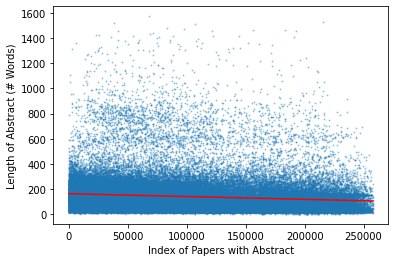

In [ ]:
index_papers_with_abstract = np.array(index)[np.array(~pd.isna(fields_df.IA))]
plt.scatter(index_papers_with_abstract, num_words, s=1, alpha=0.33)
line = np.polyfit(index_papers_with_abstract, num_words, 1)
y = np.poly1d(line)(index_papers_with_abstract)
plt.plot(index_papers_with_abstract, y, c = 'r')
plt.xlabel("Index of Papers with Abstract")
plt.ylabel("Length of Abstract (# Words)")
#There seems to be a separation above/below ~500 words
#Full texts of the first page are around 700 words

Text(0, 0.5, 'Number of References')

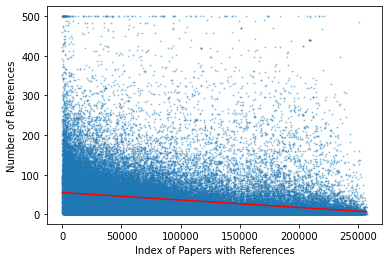

In [ ]:
index_papers_with_refs = np.array(index)[np.array(~pd.isna(fields_df.RId))]
plt.scatter(index_papers_with_refs, num_refs, s=1, alpha=0.33)
line = np.polyfit(index_papers_with_refs, num_refs, 1)
y = np.poly1d(line)(index_papers_with_refs)
plt.plot(index_papers_with_refs, y, c = 'r')
plt.xlabel("Index of Papers with References")
plt.ylabel("Number of References")
#Quite a noticeable drop in number of references as index increases.
#Collection of papers with 500 references may be questionable

Text(0, 0.5, 'Number of References')

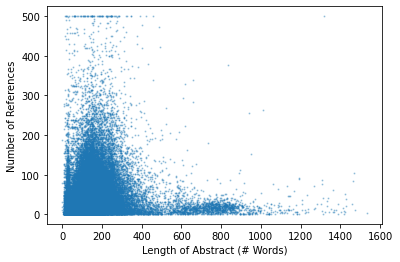

In [ ]:
smaller_fields_df = fields_df.dropna(subset=['RId', 'IA'])
smaller_num_words = smaller_fields_df["IA"].apply(lambda f: f.get('IndexLength'))
smaller_num_refs = smaller_fields_df["RId"].apply(lambda f: len(f))
plt.scatter(smaller_num_words, smaller_num_refs, s=1, alpha=0.33)
plt.xlabel("Length of Abstract (# Words)")
plt.ylabel("Number of References")
#Again see separation at ~500 word

Text(0, 0.5, 'Number of References')

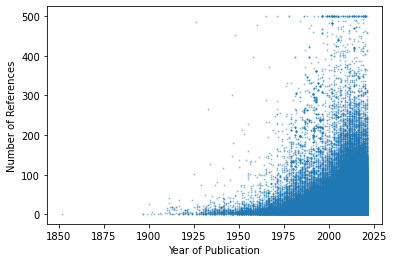

In [ ]:
plt.scatter(fields_df["Y"][index_papers_with_refs], num_refs, s=1, alpha=0.33)
plt.xlabel("Year of Publication")
plt.ylabel("Number of References")
#More recent papers seem to have more references

Text(0, 0.5, 'Length of Abstract (# Words)')

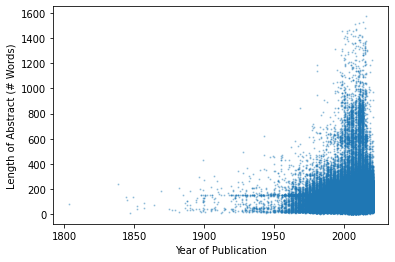

In [ ]:
plt.scatter(fields_df["Y"][index_papers_with_abstract], num_words, s=1, alpha=0.33)
plt.xlabel("Year of Publication")
plt.ylabel("Length of Abstract (# Words)")
#See abstracts with ~200 words, and those with >500

Text(0, 0.5, 'Year of Publication')

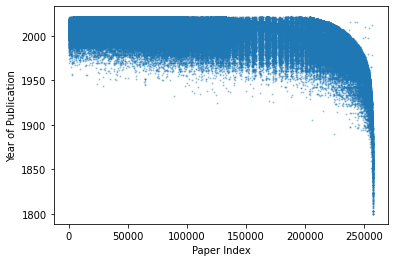

In [ ]:
plt.scatter(range(len(fields_df)), fields_df["Y"], s=1, alpha=0.33)
plt.xlabel("Paper Index")
plt.ylabel("Year of Publication")
#There is a noticeable sharp drop in publication year starting at an index of about 200000
#After paper index of about 200000, 
#we essentially no longer have papers published in more recent years

Text(0, 0.5, 'Paper Log Probability')

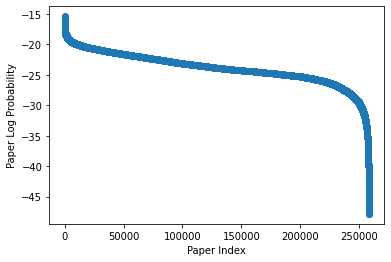

In [ ]:
plt.scatter(range(len(fields_df)), fields_df.logprob)
plt.xlabel("Paper Index")
plt.ylabel("Paper Log Probability")
#Log probability also drops off significantly

Text(0, 0.5, 'Proportion of Files with Abstract Data')

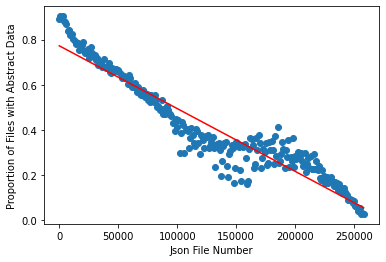

In [ ]:
num_files = math.ceil(len(fields_df)/1000)
bool_has_abstract = np.array(~pd.isna(fields_df.IA))
proportion_papers_with_abstract_by_json = [0] * num_files
for f in range(num_files):
  if f == num_files-1: #Last json file does not necessarily have 1000 papers
    proportion_papers_with_abstract_by_json[f] = np.mean(bool_has_abstract[(f*1000):(len(fields_df)-1)])
  else:
    proportion_papers_with_abstract_by_json[f] = np.mean(bool_has_abstract[(f*1000):(f*1000+999)])

plt.scatter(np.array(range(num_files))*1000, proportion_papers_with_abstract_by_json)
line = np.polyfit(np.array(range(num_files)), proportion_papers_with_abstract_by_json, 1)
y = np.poly1d(line)(np.array(range(num_files)))
plt.plot(np.array(range(num_files))*1000, y, c = 'r')
plt.xlabel("Json File Number")
plt.ylabel("Proportion of Files with Abstract Data")
#Papers with higher index (ie, in json files with higher index)
#are less likely to contain abstracts. After some intermediate stability,
#the proportion drops off more after about 200000.
#Note that json files are ordered and named by thousands 
#(ie, 0, 1000, 2000, etc.).

Text(0, 0.5, 'Proportion of Files with Reference Data')

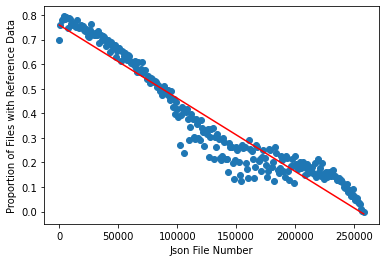

In [ ]:
bool_has_refs = np.array(~pd.isna(fields_df.RId))
proportion_papers_with_refs_by_json = [0] * num_files
for f in range(num_files):
  if f == num_files-1: #Last json file does not necessarily have 1000 papers
    proportion_papers_with_refs_by_json[f] = np.mean(bool_has_refs[(f*1000):(len(fields_df)-1)])
  else:
    proportion_papers_with_refs_by_json[f] = np.mean(bool_has_refs[(f*1000):(f*1000+999)])

plt.scatter(np.array(range(num_files))*1000, proportion_papers_with_refs_by_json)
line = np.polyfit(np.array(range(num_files)), proportion_papers_with_refs_by_json, 1)
y = np.poly1d(line)(np.array(range(num_files)))
plt.plot(np.array(range(num_files))*1000, y, c = 'r')
plt.xlabel("Json File Number")
plt.ylabel("Proportion of Files with Reference Data")
#Papers with higher index (ie, in json files with higher index)
#are also less likely to contain references, 
#dropping off more into the 200000s.

In [ ]:
#Papers published more recently are more likely to have an abstract
plt.scatter(fields_df["Y"], ~pd.isna(fields_df.IA))
line = np.polyfit(fields_df["Y"], ~pd.isna(fields_df.IA), 1)
y = np.poly1d(line)(fields_df["Y"])
plt.plot(fields_df["Y"], y, c = 'r')
#Has abstract or not vs year of publication

In [ ]:
#Papers published more recently are more likely to have references
plt.scatter(fields_df["Y"], ~pd.isna(fields_df.RId))
line = np.polyfit(fields_df["Y"], ~pd.isna(fields_df.RId), 1)
y = np.poly1d(line)(fields_df["Y"])
plt.plot(fields_df["Y"], y, c = 'r')
#Has references or not vs year of publication

# **Testing filtering by journal**

After performing the data cleaning steps outlined in the conclusion based on the above analysis, does it make sense to perform further filtering based on journal data (or lack thereof)?

In [51]:
#Filter first 200000 papers, after which papers are less recent and have lower log probability
new_fields_df = fields_df[:200000]
#Drop nan abstract/references
new_fields_df = new_fields_df.dropna(subset=['RId', 'IA']).reset_index(drop=True)
#Filter out papers from before 1950.
new_fields_df = new_fields_df[new_fields_df['Y'] >= 1950]
#Filter out abstracts less than 30 words or more than 500 words
new_fields_df = new_fields_df[new_fields_df["IA"].apply(lambda f: f.get('IndexLength')) >= 30]
new_fields_df = new_fields_df[new_fields_df["IA"].apply(lambda f: f.get('IndexLength')) <= 500]
len(new_fields_df)

59969

In [52]:
#Filter out papers that are missing journal information
#Removes about 20,000 out of 60,000 papers
new_fields_df = new_fields_df[~pd.isna(new_fields_df.J)]
len(new_fields_df)

39503

In [53]:
#Obtain IDs of journals with at least 5 (or pick another number) papers
list_of_journals_IDs = new_fields_df["J"].apply(lambda f: f.get("JId")) #Get journal ID from each entry
journal_IDs_freq = list_of_journals_IDs.value_counts()
list_of_popular_journals = journal_IDs_freq[journal_IDs_freq > 5].index

In [54]:
#For comparison, the papers that we will remove in next block
temp_fields = new_fields_df[~new_fields_df['J'].apply(lambda x: x.get('JId')).isin(list_of_popular_journals)] 

In [55]:
#Filter out papers from unpopular journals
new_fields_df = new_fields_df[new_fields_df['J'].apply(lambda x: x.get('JId')).isin(list_of_popular_journals)]
len(new_fields_df)
#Minimum 5 papers per journal removes ~7500 papers
#Minimum 10 papers per journal removes ~11000 papers

31980

In [70]:
new_abstracts = []
for ia in new_fields_df.IA:
  temp = [""]*ia['IndexLength']
  for word, idxs in ia['InvertedIndex'].items():
    for idx in idxs:
      temp[idx] = word
  new_abstracts.append(" ".join(temp))
new_num_words = new_fields_df["IA"].apply(lambda f: f.get('IndexLength'))
[new_abstracts[I] for I, num in enumerate(new_num_words) if num <= 50]
#Short abstracts (<=50 words) after journal filtering

['Epigenetics has recently evolved from a collection of diverse phenomena to a defined and far-reaching field of study. In this Essay, we examine the epistemology of epigenetics, provide a brief overview of underlying molecular mechanisms, and suggest future challenges for the field.',
 'Replication is one of the most important tools for the verification of facts within the empirical sciences. A detailed examination of the notion of replication reveals that there are many different...',
 'Homeostatic maintenance of the state of the body within an optimal range is essential for survival. Damasio and Carvalho discuss how feelings derived from body states enhance the effectiveness of the corrective response and suggest a cellular mechanism for how feelings might be generated.',
 'Multisensory integration allows information from multiple senses to be combined, with benefits for nervous-system processing. Stein and Stanford discuss the principles of multisensory integration in single neuron

In [71]:
temp_abstracts = []
for ia in temp_fields.IA:
  temp = [""]*ia['IndexLength']
  for word, idxs in ia['InvertedIndex'].items():
    for idx in idxs:
      temp[idx] = word
  temp_abstracts.append(" ".join(temp))
temp_num_words = temp_fields["IA"].apply(lambda f: f.get('IndexLength'))
[temp_abstracts[I] for I, num in enumerate(temp_num_words) if num <= 50]
#Short abstracts (<= 50 words) from papers that would be filtered out 

['Since initially writing on thematic analysis in 2006, the popularity of the method we outlined has exploded, the variety of TA approaches have expanded, and, not least, our thinking has developed a...',
 'Beckman, Kenneth B., and Bruce N. Ames. The Free Radical Theory of Aging Matures. Physiol. Rev. 78: 547–581, 1998. — The free radical theory of aging, conceived in 1956, has turned 40 and is rapidl...',
 'We discuss problems the null hypothesis significance testing (NHST) paradigm poses for replication and more broadly in the biomedical and social sciences as well as how these problems remain unreso...',
 'Department of Brain and Cognitive Sciences, The Picower Institute for Learning and Memory, Massachusetts Institute of Technology, Cambridge, MA, USA, Neurobiology of Language Department, Max Planck Institute for Psycholinguistics, Nijmegen, Netherlands, Donders Centre for Cognitive Neuroimaging, Donders Institute for Brain, Cognition and Behaviour, Radboud University Nijmegen, Nij

We find that filtering for papers published in somewhat well-represented journals (which obviously requires journal data to be present in the first place) removes a significant portion of the papers in the dataset, which is undesireable.

At the same time, it does not seem to noticably improve the quality of shorter abstracts. In fact, the abstracts of papers that would be removed appear to be of comparable quality. If there is a relationship between abstract length/quality and journal popularity, it may be obscured by the presence high-quality papers that are for some reason missing journal information; at the same time, it would be counterintuitive to remove just papers from unpopular journals while keeping those that are missing journal data entirely. More investigation of filtering by journal could be warranted, but the benefits of such filtering seem unlikely to outweigh the the costs of removing at least two-thirds of the remaining papers.

# Duplicate abstracts

Exploring the presence of duplicates after performing the data cleaning steps outlined in the conclusion

In [72]:
#Filter first 200000 papers, after which papers are less recent and have lower log probability
new_fields_df = fields_df[:200000]
#Drop nan abstract/references
new_fields_df = new_fields_df.dropna(subset=['RId', 'IA']).reset_index(drop=True)
#Filter out papers from before 1950.
new_fields_df = new_fields_df[new_fields_df['Y'] >= 1950]
#Filter out abstracts less than 30 words or more than 500 words
new_fields_df = new_fields_df[new_fields_df["IA"].apply(lambda f: f.get('IndexLength')) >= 30]
new_fields_df = new_fields_df[new_fields_df["IA"].apply(lambda f: f.get('IndexLength')) <= 500]

In [73]:
abstracts = []
for ia in new_fields_df.IA:
  temp = [""]*ia['IndexLength']
  for word, idxs in ia['InvertedIndex'].items():
    for idx in idxs:
      temp[idx] = word
  abstracts.append(" ".join(temp))
#Add (un-inverted) abstracts as column of dataframe
new_fields_df = new_fields_df.assign(A=abstracts)

In [74]:
#Add number of references as column of dataframe (to help detect duplicates)
num_refs = new_fields_df["RId"].apply(lambda f: len(f))
new_fields_df = new_fields_df.assign(NumRefs=num_refs)

In [76]:
#Number of papers with same abstract
#Duplicates are counted twice in this sum, so this number
#being odd indicates at least one triplet or other odd number.
sum(new_fields_df.duplicated(subset=['A'], keep=False))

585

In [75]:
#Number of papers with same abstract and same number of references
sum(new_fields_df.duplicated(subset=['A', 'NumRefs'], keep=False))

74

In [77]:
temp = new_fields_df.duplicated(subset=['A', 'NumRefs'], keep=False)
temp2 = new_fields_df.duplicated(subset=['A'], keep=False)
temp3 = ~temp[:] & temp2[:]

In [79]:
#Papers that have duplicate abstracts but a different number of references
[(new_fields_df.iloc[I,:]["Id"], new_fields_df.iloc[I,:]["Ti"], new_fields_df.iloc[I,:]["A"], new_fields_df.iloc[I,:]["NumRefs"], new_fields_df.iloc[I,:]["RId"]) for I, b in enumerate(temp3) if b==True]
#Each entry is paper ID, title, abstract, number of references, then reference IDs

[(3123450579,
  'coevolutionary games a mini review',
  'Prevalence of cooperation within groups of selfish individuals is puzzling in that it contradicts with the basic premise of natural selection. Favoring players with higher fitness, the latter is key for understanding the challenges faced by cooperators when competing with defectors. Evolutionary game theory provides a competent theoretical framework for addressing the subtleties of cooperation in such situations, which are known as social dilemmas. Recent advances point towards the fact that the evolution of strategies alone may be insufficient to fully exploit the benefits offered by cooperative behavior. Indeed, while spatial structure and heterogeneity, for example, have been recognized as potent promoters of cooperation, coevolutionary rules can extend the potentials of such entities further, and even more importantly, lead to the understanding of their emergence. The introduction of coevolutionary rules to evolutionary games

Duplicates are challenging because they are often not perfect duplicates. Two papers with the same abstract are most likely the same paper, but may differ in other regards. If they have different amounts of references, we could decide to keep the one with more references, or we could combine their references. Some duplicates could arise from a preprint and formal publication both being included in the dataset, so we could attempt to identify the newer paper (possibly by publication venue, since date only gives the year).

Another difficulty is that the duplicates will have unique IDs, meaning it is possible for a separate paper to reference one of the duplicates and not the other. This means that naively removing only one copy of the duplicates could interefere with links in the citation network. Instead, the IDs of duplicates would have to be reconciled.

# **CONCLUSIONS**

---



---



There is an extremely diverse set of journals represented in our dataset, with a large number of journals that have very few papers. But the abstracts of papers from these journals seem to have similar quality as others. One concern is that some journals/papers are not in English.

There are papers from the 1800s and early 1900s that would not be about congitive science in the modern sense of the term, and should be removed out.

Tags (generated by Microsoft's topic modelling) can be examined, but do not provide the flexibility we would get from our own word embeddings or topic modelling.

We wonder why the most frequent number of paper references is 1 (among those with reference data), why the distribution appears to decay exponentially, and why 500 seems to be a cap. 

Among the abstracts, we see a spike around 150 words, which coincides with a possible word/character limit imposed by some journals. Meanwhile many abstracts seem to cut off at around 200 characters. Some abstracts are nonsensical (such as titles/authors or tables of contents) and seemingly not actual abstracts, so they should be filtered out. Some abstracts mistakenly start with the word 'abstract' or a variation thereof.

Finally, we determine that the quality of papers and their metadata is related to their position in the json files. This makes some sense because they are ordered by [log probability](https://docs.microsoft.com/en-us/academic-services/knowledge-exploration-service/how-to-index-data?view=makes-3.0), which is the log "likelihood of it being named the most important in a survey conducted on all members its network/graph". Specifically, there is a clear relationship where papers with higher index (in later json files) are less likely to have references, less likely to have abstracts, and eventually are older. This suggests that we can consider removing the last few json files. 

Our findings also suggest correlations between the characteristics of papers that ought to be filtered out (for example, year of publication, log probability, and the existence of references/abstract).

Proposed data processing and cleaning steps:
*   Not use the json files after about 200000 (or about 225000)
*   Remove any papers before 1950 since that would predate our notion of cognitive science. (The 2019 paper "What happened to cognitive science?" by Nunez et al. states: "The cognitive revolution of the 1950s and 1960s..." and "Cognitive science is a product of the 1950s")
*   Remove papers with abstracts with less than 30 words or more than 500 because they are often not actually abstracts, or are contaminated with other text.
*   Handle duplicates, most easily by removing them

Additional considerations for future implementation:
* Find patterns in invalid abstracts that can be detected for more targeted removal (eg, 'abstracts' that are just a citation could be identified in the format of author + title + publication information)
* Foreign language abstracts can be removed
* Handle duplicates in a more sophisticated manner (such as combining them, or keeping the newer/better version while consolidating the IDs)
* Remove the word "abstract" incorrectly included in some  abstracts (but being careful to not remove it if it actually is part of the abstract)
* Further explore journal popularity and presence, including its relationship to other factors such as duplicates